In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from pprint import pprint
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# New Section

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1. Load the Dataset

In [ ]:
#this datset contains emails and whether they are spam or non-spam.
lingDf = pd.read_csv("messages.csv")
lingDf

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [ ]:
## Remove NaN values
lingDf.isnull().sum()
lingDf.fillna(lingDf['subject'].mode().values[0],inplace=True)

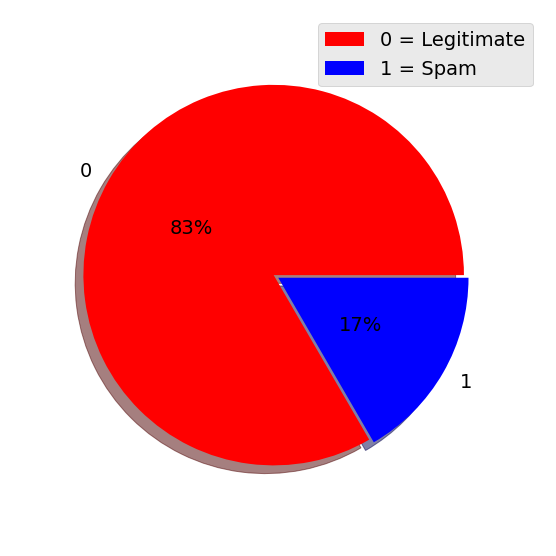

In [ ]:
## Plot the spam and ham on pie chart
# Shows a visual of the dataset and what we will be testing on.
lb=lingDf['label'].value_counts().index.tolist()
val=lingDf['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('red','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = Legitimate",'1 = Spam'])
plt.show()

In [ ]:
#the features are the values of interest and what we will be evaluating
features = lingDf[["subject", "message"]]
#the target is the value we are targetting for this project. In this example, it is 'label' which tells us
#whether it is spam or not.
target = lingDf["label"]

In [ ]:
#View a sample message
i_sample = 500
print("This message has subject")
print(features["subject"].iloc[i_sample])
print("and message")
print(features["message"].iloc[i_sample])
print("and is labeled as")
if (target.iloc[i_sample]==1):
  print("spam")
else:
  print("not spam")

This message has subject
references on romanian
and message
i am interested in getting a list of recent ( and not so recent ) work on romanian , in particular phonetics , phonology and morphology . please respond to me directly and i will post a summary to the list . - - richard sproat linguistics research department at&t bell laboratories | tel ( 908 ) 582-5296 600 mountain avenue , room 2d - 451 | fax ( 908 ) 582-7308 murray hill , nj 07974 , usa | rws @ research . att . com

and is labeled as
not spam


In [ ]:
#Remove Stop Words, punctuation, stem and lemmatize 
#Using natural language processing (toolkit) to recognize stop words, and punctuation
import nltk
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Init the Wordnet Lemmatizer
wnl = WordNetLemmatizer()

def lemmatize(s):
     s = [wnl.lemmatize(word) for word in s]
     return s

features['subject_without_stopwords'] = features["subject"].apply(lambda x: lemmatize(x))
features['subject_without_stopwords'] = features["subject"].str.replace('[^\w\s]','')
features['subject_without_stopwords'] = features['subject_without_stopwords'].apply(lambda x: [item for item in str(x).split() if item not in stop])

features['message_without_stopwords'] = features["message"].apply(lambda x: lemmatize(x))
features['message_without_stopwords'] = features["message"].str.replace('[^\w\s]','')
features['message_without_stopwords'] = features['message_without_stopwords'].apply(lambda x: [item for item in str(x).split() if item not in stop])


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
print("Without stop words and without punctuation the lemmatized message has subject")
print(' '.join(features["subject_without_stopwords"].iloc[i_sample]))
print("and message")
print(' '.join(features["message_without_stopwords"].iloc[i_sample]))
print("and is labeled as")

if (target.iloc[i_sample]==1):
  print("spam")
else:
  print("not spam")

Without stop words and without punctuation the lemmatized message has subject
references romanian
and message
interested getting list recent recent work romanian particular phonetics phonology morphology please respond directly post summary list richard sproat linguistics research department att bell laboratories tel 908 5825296 600 mountain avenue room 2d 451 fax 908 5827308 murray hill nj 07974 usa rws research att com
and is labeled as
not spam


In [ ]:
features["sub_message"] = features["subject_without_stopwords"] + features["message_without_stopwords"]
display(features.head())

features.drop('subject', axis=1,inplace=True)
features.drop('message',axis=1,inplace=True)
features.drop('subject_without_stopwords',axis=1,inplace=True)
features.drop('message_without_stopwords',axis=1,inplace=True)

features.head()

,subject,message,subject_without_stopwords,message_without_stopwords,sub_message
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,"[job, posting, appleiss, research, center]","[content, length, 3386, appleiss, research, ce...","[job, posting, appleiss, research, center, con..."
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",[sociolinguistics],"[lang, classification, grimes, joseph, e, barb...","[sociolinguistics, lang, classification, grime..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,"[query, letter, frequencies, text, identificat...","[posting, inquiry, sergei, atamas, satamas, um...","[query, letter, frequencies, text, identificat..."
3,risk,a colleague and i are researching the differin...,[risk],"[colleague, researching, differing, degrees, r...","[risk, colleague, researching, differing, degr..."
4,request book information,earlier this morning i was on the phone with a...,"[request, book, information]","[earlier, morning, phone, friend, mine, living...","[request, book, information, earlier, morning,..."


,sub_message
0,"[job, posting, appleiss, research, center, con..."
1,"[sociolinguistics, lang, classification, grime..."
2,"[query, letter, frequencies, text, identificat..."
3,"[risk, colleague, researching, differing, degr..."
4,"[request, book, information, earlier, morning,..."


In [ ]:
#presumably at some point this whole data set will be a training set, but for now split it up
X_train,X_test,y_train,y_test = train_test_split(features,target)

print(f"The training dataset contains {len(X_train)} messages.")
print(f"The test dataset contains {len(X_test)} messages.")

The training dataset contains 2169 messages.
The test dataset contains 724 messages.


In [ ]:
#Create a dictionary
counter = 0
word_dict = {}
total_spam = 0
total_ham = 0

for i,j in zip(X_train['sub_message'],y_train):
  for words in i:
    
    if words not in word_dict:
      word_dict[words] = {'spam_count': 0, 'ham_count': 0}
    
    if j:
      word_dict[words]['spam_count'] = word_dict[words]['spam_count'] + 1
      total_spam+=1
    
    else:
      word_dict[words]['ham_count'] = word_dict[words]['ham_count'] + 1 
      total_ham+=1
    
    counter +=1

In [ ]:
	pr_s, pr_h = 0.5, 0.5  #Assumming equal probability for both ham and spam
	threshold = 2   #Strength factor to handle rare words

for word in word_dict.keys():
  total_occurance = word_dict[word]['spam_count'] + word_dict[word]['ham_count']  #Total number of times the word has occured in both ham and spam

  freq_s = word_dict[word]['spam_count'] / total_spam 
  freq_h = word_dict[word]['ham_count'] / total_ham
    
  spamminess = (freq_s * pr_s) / (freq_s * pr_s + freq_h * pr_h)  #The probability that a given mail is spam, provided that this word is present.
  corrected_spaminess = (0.3 * threshold + total_occurance * spamminess) / (threshold + total_occurance)  #Considering the strength factor.
    
  word_dict[word]['spaminess'] = corrected_spaminess

In [ ]:
word_dict

{'deixis': {'ham_count': 36,
  'spam_count': 0,
  'spaminess': 0.015789473684210527},
 'demonstration': {'ham_count': 38,
  'spam_count': 1,
  'spaminess': 0.0961122317160851},
 'deictic': {'ham_count': 22,
  'spam_count': 0,
  'spaminess': 0.024999999999999998},
 'belief': {'ham_count': 35,
  'spam_count': 1,
  'spaminess': 0.10325110783377088},
 'multimedia': {'ham_count': 111,
  'spam_count': 4,
  'spaminess': 0.11688268874168357},
 'context': {'ham_count': 237,
  'spam_count': 0,
  'spaminess': 0.002510460251046025},
 'esslli': {'ham_count': 83,
  'spam_count': 0,
  'spaminess': 0.007058823529411764},
 'workshop': {'ham_count': 1388,
  'spam_count': 0,
  'spaminess': 0.00043165467625899277},
 'contexts': {'ham_count': 116,
  'spam_count': 0,
  'spaminess': 0.005084745762711864},
 'held': {'ham_count': 372,
  'spam_count': 10,
  'spaminess': 0.08844525693789779},
 'section': {'ham_count': 255,
  'spam_count': 42,
  'spaminess': 0.369149160218597},
 'language': {'ham_count': 4578,
  

In [ ]:
#This code takes a while

#test the data
import math
from decimal import *

y_pred_train=[]

for i in X_train['sub_message']:
  spaminess_list = []
  for word in i:
    if word not in word_dict:
      continue                          #Skip the word
      #spaminess = 0.5       						# Assume it is slightly spam ( Gives better FP, but lower f-score and longer computation time)
    else:
        spaminess = word_dict[word]['spaminess']
    
    spaminess_list.append(spaminess)

  # Adding up all the word probabilities
  n = 0
  for spaminess in spaminess_list:
    n +=  (math.log(1-spaminess) - math.log(spaminess))
  probability = 1 / (1 + Decimal(math.e) ** Decimal(n))

  if probability > 0.8:
    prediction = '1'
  else:
    prediction = '0'
    
  y_pred_train.append(prediction)

y_pred_train = [int(i) for i in y_pred_train]

In [ ]:
#This code takes a while

#test the data
import math
from decimal import *

y_pred_test=[]

for i in X_test['sub_message']:
  spaminess_list = []
  for word in i:
    if word not in word_dict:
      continue                          #Skip the word
      #spaminess = 0.5       						# Assume it is slightly spam ( Gives better FP, but lower f-score and longer computation time)
    else:
        spaminess = word_dict[word]['spaminess']
    
    spaminess_list.append(spaminess)

  # Adding up all the word probabilities
  n = 0
  for spaminess in spaminess_list:
    n +=  (math.log(1-spaminess) - math.log(spaminess))
  probability = 1 / (1 + Decimal(math.e) ** Decimal(n))

  if probability > 0.8:
    prediction = '1'
  else:
    prediction = '0'
    
  y_pred_test.append(prediction)

y_pred_test = [int(i) for i in y_pred_test]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

train_scores = {}
_, train_scores['False Positives'], train_scores['False Negatives'], _= confusion_matrix(y_train, y_pred_train).ravel()
train_scores['Precision'], train_scores['Recall'], train_scores['F_score'], _= precision_recall_fscore_support(y_train, y_pred_train, average='macro')

test_scores = {}
_, test_scores['False Positives'], test_scores['False Negatives'], _= confusion_matrix(y_test, y_pred_test).ravel()
test_scores['Precision'], test_scores['Recall'], test_scores['F_score'], _= precision_recall_fscore_support(y_test, y_pred_test, average='macro')

In [ ]:
	print("\nTraining Scores:")
	for key, value in sorted(train_scores.items()):
		print("{:15} : {:.5}" .format(key, float(value)))
	print("\nTesting Scores: ")
	for key, value in sorted(test_scores.items()):
		print("{:15} : {:.5}" .format(key, float(value)))


Training Scores:
F_score         : 0.99354
False Negatives : 2.0
False Positives : 6.0
Precision       : 0.99146
Recall          : 0.99564

Testing Scores: 
F_score         : 0.96996
False Negatives : 7.0
False Positives : 4.0
Precision       : 0.97547
Recall          : 0.96464


Balance The Data to 50% Not Spam and 50% Spam

In [ ]:
_ham = lingDf[lingDf['label']==0]
_spam = lingDf[lingDf['label']==1]

In [ ]:
_spam.head()


,subject,message,label
21,free,this is a multi-part message in mime format . ...,1
38,the internet success toolbox,note : we do not wish to send e-mail to anyone...,1
84,free stealth 3 . 0 bulk email software . . .,"just released . . . 30 , 000 , 000 email addre...",1
85,need more money ?,"hi , would you like to earn an extra $ 700 a w...",1
86,cable decsrambler now only $ 6 . 99 !,this is really cool ! premium channels and pay...,1


In [ ]:
_ham.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [ ]:
_ham = _ham.sample(_spam.shape[0])

In [ ]:
_ham.shape == _spam.shape

True

In [ ]:
_data = _ham.append(_spam, ignore_index = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(_data['message'],_data['label'],test_size=0.3, shuffle=True, stratify=_data['label'])

Create Bag of Words and using SVC & Random Forest

In [ ]:
svc_clf = Pipeline([('tfidf' , TfidfVectorizer()), ('clf', SVC(C = 5000, gamma = 'auto'))])

In [ ]:
svc_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=5000, gamma='auto'))])

In [ ]:
svc_y_pred = svc_clf.predict(X_test)

In [ ]:
svc_test_scores = {}
_, svc_test_scores['False Positives'], svc_test_scores['False Negatives'], _= confusion_matrix(y_test, svc_y_pred).ravel()
svc_test_scores['Precision'], svc_test_scores['Recall'], svc_test_scores['F_score'], _= precision_recall_fscore_support(y_test, svc_y_pred, average='macro')

In [ ]:
	for key, value in sorted(svc_test_scores.items()):
		print("{:15} : {:.5}" .format(key, float(value)))

F_score         : 0.98962
False Negatives : 3.0
False Positives : 0.0
Precision       : 0.9898
Recall          : 0.98966


In [ ]:
## test on random text

svc_clf.predict(['you have won tickets to Greece'])

array([1])

In [ ]:
##Random Forest

In [ ]:
rf_clf = Pipeline([('tfidf' , TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators = 100, n_jobs = -1))])

In [ ]:
rf_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [ ]:
rf_y_pred = rf_clf.predict(X_test)

In [ ]:


rf_test_scores = {}
_, rf_test_scores['False Positives'], rf_test_scores['False Negatives'], _= confusion_matrix(y_test, rf_y_pred).ravel()
rf_test_scores['Precision'], rf_test_scores['Recall'], rf_test_scores['F_score'], _= precision_recall_fscore_support(y_test, rf_y_pred, average='macro')




In [ ]:
	for key, value in sorted(rf_test_scores.items()):
		print("{:15} : {:.5}" .format(key, float(value)))

F_score         : 0.9827
False Negatives : 2.0
False Positives : 3.0
Precision       : 0.98273
Recall          : 0.98269


In [ ]:
## test on random text

rf_clf.predict(['you have won tickets to Greece'])

array([1])

Use Probability method

In [ ]:
## this code is copied from the top to check the model after balancing the data

In [ ]:
features = _data[["subject", "message"]]
target = _data["label"]

In [ ]:
#View a sample message
i_sample = 500
print("This message has subject")
print(features["subject"].iloc[i_sample])
print("and message")
print(features["message"].iloc[i_sample])
print("and is labeled as")
if (target.iloc[i_sample]==1):
  print("spam")
else:
  print("not spam")

This message has subject
help make the world a better place !
and message
dear investor , it 's quite obvious we ' re more powerful in numbers than alone , we can stamp out problems we are faced with day in day out but we make no attempt and if any very little to help irradicate a . i . d . s , famin , the homeless , cancer , child abuse , victims of rape and incest , violence and corruption world wide and do n't forget the environment ( it 's a total disaster ) . panamanian offshore banks require as little as $ 1 000 000 . 00 usd in paid in capital to qualify for bank registration . your $ 1 000 . 00 usd investment or more can lead you to an unlimited return . here 's some mathematical logistics you take 1000 people together each investing $ 1 000 . 00 usd that makes $ 1 000 000 . 00 usd . we go to panama and register for public listing so all our shareholders can each get 1000 shares each at $ 1 . 00 per share , if all goes well and the securities commission accepts the public listin

In [ ]:
#Remove Stop Words, punctioan, stem and lemmatize 
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
import nltk

stop = stopwords.words('english')

# Init the Wordnet Lemmatizer
wnl = WordNetLemmatizer()

def lemmatize(s):
     s = [wnl.lemmatize(word) for word in s]
     return s

features['subject_without_stopwords'] = features["subject"].apply(lambda x: lemmatize(x))
features['subject_without_stopwords'] = features["subject"].str.replace('[^\w\s]','')
features['subject_without_stopwords'] = features['subject_without_stopwords'].apply(lambda x: [item for item in str(x).split() if item not in stop])

features['message_without_stopwords'] = features["message"].apply(lambda x: lemmatize(x))
features['message_without_stopwords'] = features["message"].str.replace('[^\w\s]','')
features['message_without_stopwords'] = features['message_without_stopwords'].apply(lambda x: [item for item in str(x).split() if item not in stop])


In [ ]:
print("Without stop words and without punctuation the lemmatized message has subject")
print(' '.join(features["subject_without_stopwords"].iloc[i_sample]))
print("and message")
print(' '.join(features["message_without_stopwords"].iloc[i_sample]))
print("and is labeled as")

if (target.iloc[i_sample]==1):
  print("spam")
else:
  print("not spam")

Without stop words and without punctuation the lemmatized message has subject
help make world better place
and message
dear investor quite obvious powerful numbers alone stamp problems faced day day make attempt little help irradicate famin homeless cancer child abuse victims rape incest violence corruption world wide nt forget environment total disaster panamanian offshore banks require little 1 000 000 00 usd paid capital qualify bank registration 1 000 00 usd investment lead unlimited return mathematical logistics take 1000 people together investing 1 000 00 usd makes 1 000 000 00 usd go panama register public listing shareholders get 1000 shares 1 00 per share goes well securities commission accepts public listing go step 2 step 2 go banking commission apply bank license upon approval got bank owned 1000 shareholders holding 1000 shares traded freely apply listing panamanian stock exchange exchange therafter let look example see power numbers minimal interest paid example sake 12 a

In [ ]:
features["sub_message"] = features["subject_without_stopwords"] + features["message_without_stopwords"]
display(features.head())

features.drop('subject', axis=1,inplace=True)
features.drop('message',axis=1,inplace=True)
features.drop('subject_without_stopwords',axis=1,inplace=True)
features.drop('message_without_stopwords',axis=1,inplace=True)

features.head()

,subject,message,subject_without_stopwords,message_without_stopwords,sub_message
0,"job opportunity at celex , the netherlands",job opportunity at celex : german database dev...,"[job, opportunity, celex, netherlands]","[job, opportunity, celex, german, database, de...","[job, opportunity, celex, netherlands, job, op..."
1,berkeley women and language conference announc...,the 1998 berkeley women and language conferenc...,"[berkeley, women, language, conference, announ...","[1998, berkeley, women, language, conference, ...","[berkeley, women, language, conference, announ..."
2,info re : wilhelm von timroth,is there somebody who could help me to get in ...,"[info, wilhelm, von, timroth]","[somebody, could, help, get, touch, wilhelm, v...","[info, wilhelm, von, timroth, somebody, could,..."
3,"summary : ' typewriter ' and "" canadian "" raising","i recently asked , as i do periodically , if a...","[summary, typewriter, canadian, raising]","[recently, asked, periodically, anyone, knows,...","[summary, typewriter, canadian, raising, recen..."
4,re : 3 . 396 chomsky citations,i ' m neither surprised by the number of choms...,"[3, 396, chomsky, citations]","[neither, surprised, number, chomsky, citation...","[3, 396, chomsky, citations, neither, surprise..."


,sub_message
0,"[job, opportunity, celex, netherlands, job, op..."
1,"[berkeley, women, language, conference, announ..."
2,"[info, wilhelm, von, timroth, somebody, could,..."
3,"[summary, typewriter, canadian, raising, recen..."
4,"[3, 396, chomsky, citations, neither, surprise..."


In [ ]:
#presumably at some point this whole data set will be a training set, but for now split it up
X_train,X_test,y_train,y_test = train_test_split(features,target)

print(f"The training dataset contains {len(X_train)} messages.")
print(f"The test dataset contains {len(X_test)} messages.")

The training dataset contains 721 messages.
The test dataset contains 241 messages.


In [ ]:
#Create a dictionary
counter = 0
word_dict = {}
total_spam = 0
total_ham = 0

for i,j in zip(X_train['sub_message'],y_train):
  for words in i:
    
    if words not in word_dict:
      word_dict[words] = {'spam_count': 0, 'ham_count': 0}
    
    if j:
      word_dict[words]['spam_count'] = word_dict[words]['spam_count'] + 1
      total_spam+=1
    
    else:
      word_dict[words]['ham_count'] = word_dict[words]['ham_count'] + 1 
      total_ham+=1
    
    counter +=1

In [ ]:
	pr_s, pr_h = 0.5, 0.5  #Assumming equal probability for both ham and spam
	threshold = 2   #Strength factor to handle rare words

for word in word_dict.keys():
  total_occurance = word_dict[word]['spam_count'] + word_dict[word]['ham_count']  #Total number of times the word has occured in both ham and spam

  freq_s = word_dict[word]['spam_count'] / total_spam 
  freq_h = word_dict[word]['ham_count'] / total_ham
    
  spamminess = (freq_s * pr_s) / (freq_s * pr_s + freq_h * pr_h)  #The probability that a given mail is spam, provided that this word is present.
  corrected_spaminess = (0.3 * threshold + total_occurance * spamminess) / (threshold + total_occurance)  #Considering the strength factor.
    
  word_dict[word]['spaminess'] = corrected_spaminess

In [ ]:
#This code takes a while

#test the data
import math
from decimal import *

y_pred_train=[]

for i in X_train['sub_message']:
  spaminess_list = []
  for word in i:
    if word not in word_dict:
      continue                          #Skip the word
      #spaminess = 0.5       						# Assume it is slightly spam ( Gives better FP, but lower f-score and longer computation time)
    else:
        spaminess = word_dict[word]['spaminess']
    
    spaminess_list.append(spaminess)

  # Adding up all the word probabilities
  n = 0
  for spaminess in spaminess_list:
    n +=  (math.log(1-spaminess) - math.log(spaminess))
  probability = 1 / (1 + Decimal(math.e) ** Decimal(n))

  if probability > 0.8:
    prediction = '1'
  else:
    prediction = '0'
    
  y_pred_train.append(prediction)

y_pred_train = [int(i) for i in y_pred_train]

In [ ]:
#This code takes a while

#test the data
import math
from decimal import *

y_pred_test=[]

for i in X_test['sub_message']:
  spaminess_list = []
  for word in i:
    if word not in word_dict:
      continue                          #Skip the word
      #spaminess = 0.5       						# Assume it is slightly spam ( Gives better FP, but lower f-score and longer computation time)
    else:
        spaminess = word_dict[word]['spaminess']
    
    spaminess_list.append(spaminess)

  # Adding up all the word probabilities
  n = 0
  for spaminess in spaminess_list:
    n +=  (math.log(1-spaminess) - math.log(spaminess))
  probability = 1 / (1 + Decimal(math.e) ** Decimal(n))

  if probability > 0.8:
    prediction = '1'
  else:
    prediction = '0'
    
  y_pred_test.append(prediction)

y_pred_test = [int(i) for i in y_pred_test]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

train_scores = {}
_, train_scores['False Positives'], train_scores['False Negatives'], _= confusion_matrix(y_train, y_pred_train).ravel()
train_scores['Precision'], train_scores['Recall'], train_scores['F_score'], _= precision_recall_fscore_support(y_train, y_pred_train, average='macro')

test_scores = {}
_, test_scores['False Positives'], test_scores['False Negatives'], _= confusion_matrix(y_test, y_pred_test).ravel()
test_scores['Precision'], test_scores['Recall'], test_scores['F_score'], _= precision_recall_fscore_support(y_test, y_pred_test, average='macro')

In [ ]:
	print("\nTraining Scores:")
	for key, value in sorted(train_scores.items()):
		print("{:15} : {:.5}" .format(key, float(value)))
	print("\nTesting Scores: ")
	for key, value in sorted(test_scores.items()):
		print("{:15} : {:.5}" .format(key, float(value)))


Training Scores:
F_score         : 0.99445
False Negatives : 1.0
False Positives : 3.0
Precision       : 0.99447
Recall          : 0.99445

Testing Scores: 
F_score         : 0.97095
False Negatives : 5.0
False Positives : 2.0
Precision       : 0.97129
Recall          : 0.9709


Import SMS Spam Collection Dataset by Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. 

In [ ]:
sms_df = pd.read_csv("/spam.csv", encoding='latin-1')

In [ ]:
sms_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
sms_df['v1'][sms_df.v1 == 'ham'] = int(0)
sms_df['v1'][sms_df.v1 == 'spam'] = int(1)

In [ ]:
sms_df = sms_df[["v1",'v2']]


In [ ]:
sms_df = sms_df.rename(columns={ 'v1': 'label', 'v2':'message'})

In [ ]:
sms_df.label = sms_df.label.astype(str).astype(int)

In [ ]:
X_model, X_valid, y_model, y_valid = train_test_split(sms_df['message'],sms_df['label'],test_size=0.3, shuffle=True, stratify=sms_df['label'])

In [ ]:
svc_clf.fit(X_model,y_model)

svc_y_pred_sms = svc_clf.predict(X_valid)

In [ ]:
svc_test_scores_sms = {}
_, svc_test_scores_sms['False Positives'], svc_test_scores_sms['False Negatives'], _= confusion_matrix(y_valid, svc_y_pred_sms).ravel()
svc_test_scores_sms['Precision'], svc_test_scores_sms['Recall'], svc_test_scores_sms['F_score'], _= precision_recall_fscore_support(y_valid, svc_y_pred_sms, average='macro')

In [ ]:
	for key, value in sorted(svc_test_scores_sms.items()):
		print("{:15} : {:.5}" .format(key, float(value)))

F_score         : 0.9639
False Negatives : 23.0
False Positives : 4.0
Precision       : 0.9824
Recall          : 0.94728


In [ ]:
##Random Forest

In [ ]:
rf_clf.fit(X_model,y_model)

rf_y_pred_sms = rf_clf.predict(X_valid)

In [ ]:
rf_test_scores_sms = {}
_, rf_test_scores_sms['False Positives'], rf_test_scores_sms['False Negatives'], _= confusion_matrix(y_valid, rf_y_pred_sms).ravel()
rf_test_scores_sms['Precision'], rf_test_scores_sms['Recall'], rf_test_scores_sms['F_score'], _= precision_recall_fscore_support(y_valid, svc_y_pred_sms, average='macro')

In [ ]:
	for key, value in sorted(rf_test_scores_sms.items()):
		print("{:15} : {:.5}" .format(key, float(value)))

F_score         : 0.9639
False Negatives : 37.0
False Positives : 0.0
Precision       : 0.9824
Recall          : 0.94728


In [ ]:
len(svc_y_pred_sms)

1672

Text(0.5, 257.44, 'Predicted label')

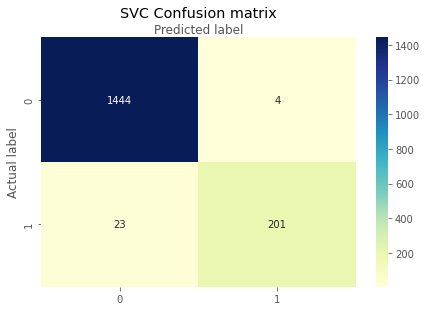

In [ ]:
import seaborn as sns
cnf_matrix = confusion_matrix(y_valid, svc_y_pred_sms)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVC Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

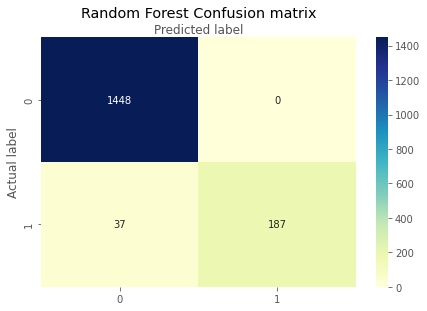

In [ ]:
import seaborn as sns

cnf_matrix = confusion_matrix(y_valid, rf_y_pred_sms)

class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')